<a href="https://colab.research.google.com/github/Ranjithkrishnasamy/Datascience-assignments-6-to-10/blob/main/Support%20vector%20machines(Salarydata).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
path = r"/content/SalaryData_Train(1).csv"
patha = r"/content/SalaryData_Test(1).csv"

In [4]:
train_data = pd.read_csv(path)
test_data = pd.read_csv(patha)

In [5]:
X_train = train_data.drop('Salary', axis=1)
y_train = train_data['Salary']
X_test = test_data.drop('Salary', axis=1)
y_test = test_data['Salary']

In [6]:
categorical_cols = ['workclass', 'education', 'maritalstatus', 'occupation', 'relationship', 'race', 'sex', 'native']
label_encoder = LabelEncoder()
for col in categorical_cols:
    X_train[col] = label_encoder.fit_transform(X_train[col])
    X_test[col] = label_encoder.transform(X_test[col])

In [7]:
numeric_cols = ['age', 'educationno', 'capitalgain', 'capitalloss']
scaler = StandardScaler()
X_train[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])
X_test[numeric_cols] = scaler.transform(X_test[numeric_cols])

In [8]:
svm = SVC()
svm.fit(X_train, y_train)

SVC()

In [9]:
y_pred = svm.predict(X_test)

In [10]:
accuracy = accuracy_score(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)

In [11]:
print('Accuracy:', accuracy)
print('Confusion Matrix:')
print(confusion_mat)

Accuracy: 0.8074369189907038
Confusion Matrix:
[[11165   195]
 [ 2705   995]]


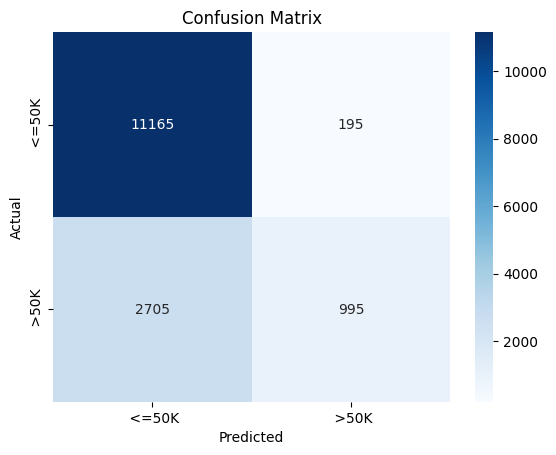

In [12]:
labels = np.unique(y_test)
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()